In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('../../Data/BaseOrdinal.csv')

In [3]:
ordinal = ordinal.drop(['PID', 'Unnamed: 0.1'], axis=1)
ordinal.head(3)

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,856,126000,68.516053,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0
1,1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,1049,139500,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0
2,2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,1001,124900,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0


In [4]:
ordinal.shape

(2580, 81)

In [5]:
ordinal = ordinal.assign(Log10 = np.log10(ordinal.SalePrice.values))
ordinal.shape 

(2580, 82)

In [6]:
ordinal = ordinal.drop(['SalePrice'], axis=1)
ordinal.shape

(2580, 81)

In [7]:
cols = ordinal.columns

In [8]:
len(cols)

81

In [9]:
ordinal.head(3)

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Log10
0,0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,856,68.516053,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,5.100371
1,1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,1049,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,5.144574
2,2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,1001,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,5.096562


In [10]:
X = ordinal.drop(['Log10'], axis=1).values
y = ordinal.Log10.values

In [11]:
y

array([5.10037055, 5.14457421, 5.09656244, ..., 5.161368  , 5.33745926,
       5.33243846])

In [12]:
X.shape

(2580, 80)

In [13]:
Ridge = Ridge()

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)

train = pd.DataFrame(np.hstack((X_train, Y_train.reshape(-1,1))),
                         index=X_train[:,0], columns=cols).drop(['Unnamed: 0'], axis=1)

In [15]:
train

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Log10
1315.0,13.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,7.0,1.0,0.0,12.0,13.0,2.0,3.0,4.0,2.0,5.0,5.0,0.0,0.0,5.0,1.0,2.0,1.0,4.0,4.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,1.0,0.0,9.0,4.0,980.0,75.000000,9750.0,5.0,5.0,1967.0,1967.0,0.000000,400.0,480.0,100.0,980.0,980.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,0.0,1967.0,1.0,384.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,5.131939
1242.0,10.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,5.0,2.0,2.0,0.0,5.0,1.0,0.0,5.0,5.0,2.0,2.0,4.0,2.0,2.0,5.0,2.0,6.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,7.0,2.0,9.0,4.0,2290.0,68.516053,11250.0,8.0,5.0,2002.0,2002.0,0.000000,0.0,0.0,1128.0,1128.0,1149.0,1141.0,0.0,0.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2002.0,2.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.408070
1453.0,9.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,0.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,1.0,1.0,0.0,4.0,6.0,3.0,1.0,3.0,5.0,5.0,2.0,3.0,3.0,1.0,6.0,2.0,9.0,4.0,1278.0,60.000000,7200.0,6.0,5.0,1954.0,1954.0,0.000000,673.0,0.0,181.0,854.0,854.0,424.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,6.0,0.0,1954.0,1.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.105510
1041.0,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,23.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,10.0,3.0,9.0,4.0,1200.0,67.000000,10083.0,7.0,5.0,2003.0,2003.0,99.308262,833.0,0.0,343.0,1176.0,1200.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,1.0,5.0,0.0,2003.0,2.0,555.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,5.266937
406.0,9.0,6.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,3.0,2.0,2.0,0.0,0.0,1.0,0.0,11.0,12.0,1.0,3.0,4.0,0.0,5.0,5.0,3.0,5.0,6.0,1.0,2.0,1.0,4.0,4.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,3.0,9.0,4.0,1142.0,60.000000,6000.0,5.0,5.0,1924.0,1950.0,444.000000,220.0,0.0,248.0,468.0,822.0,320.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,6.0,0.0,1924.0,1.0,320.0,0.0,0.0,98.0,0.0,0.0,0.0,0.0,4.968483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785.0,5.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,22.0,1.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,0.0,6.0,1.0,4.0,1.0,4.0,1.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,3.0,7.0,1.0,9.0,4.0,1120.0,85.000000,6970.0,4.0,5.0,1961.0,1961.0,0.000000,932.0,0.0,108.0,1040.0,1120.0,0.0,0.0,1.0,0.0,1.0,1.0,3.0,1.0,5.0,0.0,1961.0,2.0,544.0,168.0,0.0,0.0,0.0,0.0,0.0,400.0,5.110590
373.0,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,19.0,2.0,2.0,0.0,5.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,0.0,5.0,2.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,0.0,2.0,9.0,4.0,2649.0,130.000000,16900.0,8.0,5.0,2001.0,2002.0,1110.000000,1075.0,0.0,404.0,1479.0,1515.0,1134.0,0.0,1.0,0.0,2.0,1.0,4.0,1.0,10.0,1.0,2001.0,3.0,746.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,5.624540
1533.0,5.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,22.0,2.0,2.0,0.0,2.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,1.0,1.0,2.0,1.0,4.0,4.0,6.0,4.0,5.0,3.0,5.0,5.0,2.0,3.0,1.0,1.0,3.0,3.0,9.0,4.0,864.0

In [16]:
Train_Values = train.values

In [17]:
scaler = preprocessing.StandardScaler().fit(Train_Values)
Train_Values_Scaled = scaler.transform(Train_Values)

In [18]:
Train_Values_Scaled

array([[ 1.55081373,  0.01436561,  0.06443237, ..., -0.05957265,
        -0.09950507, -0.50433984],
       [ 0.7491687 ,  0.01436561,  0.06443237, ..., -0.05957265,
        -0.09950507,  1.16365979],
       [ 0.48195369,  0.01436561,  0.06443237, ..., -0.05957265,
        -0.09950507, -0.66398779],
       ...,
       [-0.58690635,  0.01436561,  0.06443237, ..., -0.05957265,
        -0.09950507, -2.53925849],
       [ 2.08524375,  0.01436561,  0.06443237, ..., -0.05957265,
        -0.09950507, -0.5140382 ],
       [-0.58690635,  0.01436561,  0.06443237, ..., -0.05957265,
        -0.09950507, -0.71593807]])

In [39]:
iso = IsolationForest(n_estimators=1000, max_samples=750, contamination=0.005)
results = iso.fit_predict(Train_Values_Scaled)

In [40]:
train = train.assign(Outlier = results)
#train.head(3)

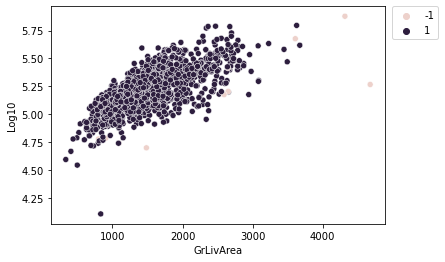

In [41]:
plt.figure()
sns.scatterplot(data=train, x='GrLivArea', y='Log10', hue='Outlier')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [42]:
outs = train[train.Outlier==-1]

In [43]:
outs

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Log10,Outlier
309.0,10.0,5.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,7.0,4.0,4.0,0.0,5.0,3.0,0.0,5.0,5.0,3.0,0.0,4.0,2.0,0.0,5.0,1.0,2.0,6.0,1.0,0.0,1.0,4.0,0.0,6.0,2.0,3.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,1.0,1.0,6.0,5.0,4676.0,130.000000,40094.0,10.0,5.0,2007.0,2008.0,762.0,2260.0,0.0,878.0,3138.0,3138.0,1538.0,0.0,1.0,0.0,3.0,1.0,3.0,1.0,11.0,1.0,2007.000000,3.0,884.0,208.0,406.0,0.0,0.0,0.0,0.0,0.0,5.266584,-1
1233.0,6.0,5.0,1.0,1.0,0.0,2.0,0.0,4.0,2.0,7.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,1.0,1.0,0.0,1.0,4.0,1.0,1.0,6.0,1.0,2.0,0.0,0.0,1.0,0.0,3.0,6.0,1.0,3.0,3.0,2.0,3.0,4.0,1.0,5.0,3.0,9.0,4.0,904.0,68.516053,10020.0,1.0,1.0,1922.0,1950.0,0.0,350.0,0.0,333.0,683.0,904.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,4.0,0.0,1976.982048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.785330,-1
2004.0,12.0,6.0,1.0,1.0,1.0,3.0,0.0,4.0,0.0,20.0,0.0,2.0,0.0,3.0,1.0,6.0,13.0,14.0,2.0,2.0,2.0,0.0,5.0,5.0,2.0,6.0,6.0,1.0,0.0,1.0,4.0,0.0,6.0,5.0,5.0,3.0,0.0,5.0,2.0,3.0,0.0,1.0,8.0,0.0,9.0,4.0,3608.0,90.000000,22950.0,10.0,9.0,1892.0,1993.0,0.0,0.0,0.0,1107.0,1107.0,1518.0,1518.0,572.0,0.0,0.0,2.0,1.0,4.0,1.0,12.0,2.0,1993.000000,3.0,840.0,0.0,260.0,0.0,0.0,410.0,0.0,0.0,5.676694,-1
2204.0,15.0,4.0,1.0,2.0,3.0,3.0,0.0,4.0,0.0,21.0,2.0,2.0,2.0,5.0,0.0,4.0,9.0,4.0,2.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0,3.0,6.0,1.0,3.0,3.0,2.0,3.0,4.0,3.0,4.0,4.0,9.0,4.0,2650.0,60.000000,7200.0,4.0,6.0,1967.0,1967.0,0.0,0.0,0.0,0.0,0.0,862.0,1788.0,0.0,0.0,0.0,3.0,0.0,6.0,2.0,10.0,0.0,1976.982048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,5.204120,-1
2273.0,6.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,3.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,5.0,1.0,3.0,6.0,6.0,3.0,1.0,0.0,0.0,1.0,0.0,4.0,6.0,1.0,3.0,3.0,0.0,3.0,4.0,1.0,0.0,3.0,5.0,4.0,800.0,51.000000,6120.0,2.0,3.0,1936.0,1950.0,0.0,0.0,0.0,264.0,264.0,800.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,4.0,1.0,1976.982048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.778151,-1
487.0,13.0,5.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,27.0,2.0,2.0,0.0,7.0,1.0,0.0,14.0,14.0,1.0,2.0,1.0,1.0,2.0,5.0,1.0,0.0,1.0,1.0,2.0,1.0,4.0,2.0,4.0,5.0,1.0,2.0,5.0,5.0,2.0,2.0,0.0,1.0,0.0,0.0,9.0,4.0,2646.0,100.000000,14330.0,7.0,4.0,1974.0,1974.0,145.0,1023.0,497.0,228.0,1748.0,2151.0,495.0,0.0,1.0,2.0,2.0,0.0,3.0,1.0,9.0,4.0,1974.000000,2.0,550.0,641.0,100.0,0.0,0.0,0.0,800.0,0.0,5.414973,-1
50.0,15.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,21.0,2.0,2.0,2.0,5.0,3.0,0.0,13.0,9.0,2.0,3.0,4.0,2.0,5.0,5.0,2.0,5.0,6.0,3.0,1.0,0.0,0.0,4.0,3.0,3.0,6.0,1.0,3.0,3.0,2.0,3.0,4.0,3.0,0.0,1.0,9.0,1.0,2592.0,60.000000,10890.0,5.0,6.0,1923.0,1950.0,0.0,371.0,0.0,925.0,1296.0,1296.0,1296.0,0.0,2.0,0.0,2.0,0.0,6.0,2.0,12.0,0.0,1976.982048,0.0,0.0,0.0,742.0,240.0,0.0,0.0,0.0,1512.0,5.176091,-1
2425.0,4.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,1.0,5.0,3.0,0.0,12.0,15.0,2.0,1.0,1.0,3.0,3.0,3.0,4.0,4.0,4.0,1.0,1.0,0.0,4.0,1.0,4.0,3.0,6.0,1.0,3.0,3.0,0.0,3.0,4.0,2.0,9.0,4.0,9.0,4.0,1092.0,70.000000,5600.0,4.0,5.0,1930.0,1950.0,0.0,0.0,0.0,0.0,0.0,372.0,720.0,0.0,0.0,0.0,2.0,0.0,3.0,2.0,7.0,0.0,1976.982048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500.0,4.740363,-1
1007.0,10.0,5.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,18.0,2.0,2.0,0.0,5.0,1.0,6.0,6.0,6.0,1.0,0.0,4.0,2.0,0.0,5.0,1.0,2.0,6

In [44]:
results2 = iso.fit_predict(train.values)

In [45]:
train2 = train.assign(Outlier = results2)

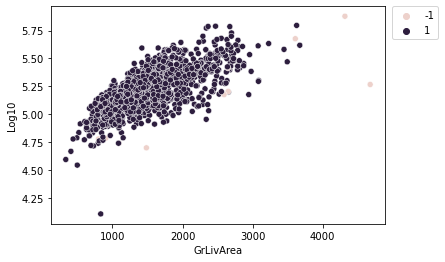

In [46]:
plt.figure()
sns.scatterplot(data=train2, x='GrLivArea', y='Log10', hue='Outlier')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [47]:
outs2 = train2[train2.Outlier==-1]

In [48]:
outs2

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Log10,Outlier
309.0,10.0,5.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,7.0,4.0,4.0,0.0,5.0,3.0,0.0,5.0,5.0,3.0,0.0,4.0,2.0,0.0,5.0,1.0,2.0,6.0,1.0,0.0,1.0,4.0,0.0,6.0,2.0,3.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,1.0,1.0,6.0,5.0,4676.0,130.000000,40094.0,10.0,5.0,2007.0,2008.0,762.0,2260.0,0.0,878.0,3138.0,3138.0,1538.0,0.0,1.0,0.0,3.0,1.0,3.0,1.0,11.0,1.0,2007.000000,3.0,884.0,208.0,406.0,0.0,0.0,0.0,0.0,0.0,5.266584,-1
1233.0,6.0,5.0,1.0,1.0,0.0,2.0,0.0,4.0,2.0,7.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,1.0,1.0,0.0,1.0,4.0,1.0,1.0,6.0,1.0,2.0,0.0,0.0,1.0,0.0,3.0,6.0,1.0,3.0,3.0,2.0,3.0,4.0,1.0,5.0,3.0,9.0,4.0,904.0,68.516053,10020.0,1.0,1.0,1922.0,1950.0,0.0,350.0,0.0,333.0,683.0,904.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,4.0,0.0,1976.982048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.785330,-1
2004.0,12.0,6.0,1.0,1.0,1.0,3.0,0.0,4.0,0.0,20.0,0.0,2.0,0.0,3.0,1.0,6.0,13.0,14.0,2.0,2.0,2.0,0.0,5.0,5.0,2.0,6.0,6.0,1.0,0.0,1.0,4.0,0.0,6.0,5.0,5.0,3.0,0.0,5.0,2.0,3.0,0.0,1.0,8.0,0.0,9.0,4.0,3608.0,90.000000,22950.0,10.0,9.0,1892.0,1993.0,0.0,0.0,0.0,1107.0,1107.0,1518.0,1518.0,572.0,0.0,0.0,2.0,1.0,4.0,1.0,12.0,2.0,1993.000000,3.0,840.0,0.0,260.0,0.0,0.0,410.0,0.0,0.0,5.676694,-1
2204.0,15.0,4.0,1.0,2.0,3.0,3.0,0.0,4.0,0.0,21.0,2.0,2.0,2.0,5.0,0.0,4.0,9.0,4.0,2.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0,3.0,6.0,1.0,3.0,3.0,2.0,3.0,4.0,3.0,4.0,4.0,9.0,4.0,2650.0,60.000000,7200.0,4.0,6.0,1967.0,1967.0,0.0,0.0,0.0,0.0,0.0,862.0,1788.0,0.0,0.0,0.0,3.0,0.0,6.0,2.0,10.0,0.0,1976.982048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,5.204120,-1
2273.0,6.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,3.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,5.0,1.0,3.0,6.0,6.0,3.0,1.0,0.0,0.0,1.0,0.0,4.0,6.0,1.0,3.0,3.0,0.0,3.0,4.0,1.0,0.0,3.0,5.0,4.0,800.0,51.000000,6120.0,2.0,3.0,1936.0,1950.0,0.0,0.0,0.0,264.0,264.0,800.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,4.0,1.0,1976.982048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.778151,-1
487.0,13.0,5.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,27.0,2.0,2.0,0.0,7.0,1.0,0.0,14.0,14.0,1.0,2.0,1.0,1.0,2.0,5.0,1.0,0.0,1.0,1.0,2.0,1.0,4.0,2.0,4.0,5.0,1.0,2.0,5.0,5.0,2.0,2.0,0.0,1.0,0.0,0.0,9.0,4.0,2646.0,100.000000,14330.0,7.0,4.0,1974.0,1974.0,145.0,1023.0,497.0,228.0,1748.0,2151.0,495.0,0.0,1.0,2.0,2.0,0.0,3.0,1.0,9.0,4.0,1974.000000,2.0,550.0,641.0,100.0,0.0,0.0,0.0,800.0,0.0,5.414973,-1
50.0,15.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,21.0,2.0,2.0,2.0,5.0,3.0,0.0,13.0,9.0,2.0,3.0,4.0,2.0,5.0,5.0,2.0,5.0,6.0,3.0,1.0,0.0,0.0,4.0,3.0,3.0,6.0,1.0,3.0,3.0,2.0,3.0,4.0,3.0,0.0,1.0,9.0,1.0,2592.0,60.000000,10890.0,5.0,6.0,1923.0,1950.0,0.0,371.0,0.0,925.0,1296.0,1296.0,1296.0,0.0,2.0,0.0,2.0,0.0,6.0,2.0,12.0,0.0,1976.982048,0.0,0.0,0.0,742.0,240.0,0.0,0.0,0.0,1512.0,5.176091,-1
2425.0,4.0,6.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,1.0,5.0,3.0,0.0,12.0,15.0,2.0,1.0,1.0,3.0,3.0,3.0,4.0,4.0,4.0,1.0,1.0,0.0,4.0,1.0,4.0,3.0,6.0,1.0,3.0,3.0,0.0,3.0,4.0,2.0,9.0,4.0,9.0,4.0,1092.0,70.000000,5600.0,4.0,5.0,1930.0,1950.0,0.0,0.0,0.0,0.0,0.0,372.0,720.0,0.0,0.0,0.0,2.0,0.0,3.0,2.0,7.0,0.0,1976.982048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500.0,4.740363,-1
1007.0,10.0,5.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,18.0,2.0,2.0,0.0,5.0,1.0,6.0,6.0,6.0,1.0,0.0,4.0,2.0,0.0,5.0,1.0,2.0,6